**DESCRIPTION OF THE TASK**

**There are three files containing 4 training datasets, one test dataset, and 50 ideal functions. All data respectively consists of x-y-pairs of values.**

**Your job (task 1) is to use the training data to choose the four ideal functions which are the best fit out of the fifty functions provided.Afterwards, (task 2) use the test data provided to determine for each and every x-y-pair of values whether or not they can be assigned to the four chosen ideal functions. if so, the program also needs to execute the mapping and save it together with the deviation at hand.**

The criterion for choosing the ideal functions for the training function is how they minimize the sum of all y-deviations squared (Least-Square) 

The criterion for mapping the individual test case to the four ideal functions is that the existing maximum deviation of the calculated regression does not exceed the largest deviation between training dataset and the ideal function chosen for it by more than factor sqrt(2)

**SOLUTION**

**Libraries**

In [1]:
from pathlib import Path
import sqlite3

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import math
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

**PART ONE**

*This part of the program creates and saves the data into an SQLite database, and then accesses it for the analysis*

In [2]:
## CREATING A SQLITE DATABASE
Path('PWPA.db').touch()

In [3]:
## CREATE DATABASE CONNECTION AND CURSOR 
conn = sqlite3.connect('PWPA.db')
c = conn.cursor()

In [4]:
## create three SQLITE TABLES

c.execute('''CREATE TABLE train (x, y1, y2, y3, y4)''')

c.execute('''CREATE TABLE test (x, y)''')

c.execute('''CREATE TABLE ideal (x, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19, y20,
                                y21, y22, y23, y24, y25, y26, y27, y28, y29, y30, y31, y32, y33, y34, y35, y36, y37, y38, y39,
                                y40, y41, y42, y43, y44, y45, y46, y47, y48, y49, y50)''')

In [5]:
## LOAD THE CSV FILES INTO THE SQLITE DATABASE

# load the data into Pandas DataFrames
user_1 = pd.read_csv("train.csv")
user_2 = pd.read_csv("test.csv")
user_3 = pd.read_csv("ideal.csv")

# write the data into sqlite tables
user_1.to_sql('train', conn, if_exists='append', index = False)
user_2.to_sql('test', conn, if_exists='append', index = False)
user_3.to_sql('ideal', conn, if_exists='append', index = False)

400

In [6]:
# LOADING THE DATA FROM THE DATABASE INTO THREE DATAFRAME

con = sqlite3.connect("PWPA.db")
df_train = pd.read_sql_query("SELECT * from train", conn)
df_test = pd.read_sql_query("SELECT * from test", conn)
df_ideal = pd.read_sql_query("SELECT * from ideal", conn)

con.close()

**TASK 1**

**PART TWO**

*This part of the program focus on studying the first training equation. It determines the type of equation of y1 training and the corresponding ideal equation*

In [7]:
# Explore
df_train.head()

,x,y1,y2,y3,y4
0,-20.0,19.682550,-8.643847,-0.792252,-8795.289
1,-19.9,20.401932,-8.724133,-1.132539,-8667.858
2,-19.8,19.618414,-8.848171,-0.610908,-8541.768
3,-19.7,19.495897,-9.648293,-1.236778,-8416.403
4,-19.6,20.155570,-9.133513,-0.416563,-8292.688


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       400 non-null    float64
 1   y1      400 non-null    float64
 2   y2      400 non-null    float64
 3   y3      400 non-null    float64
 4   y4      400 non-null    float64
dtypes: float64(5)
memory usage: 15.8 KB


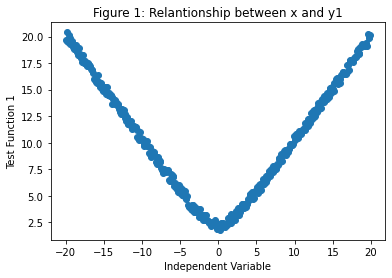

In [9]:
#CHECK THE RELATIONSHIP BETWEEN X and each of train Functions
plt.scatter(x=df_train["x"], y=df_train["y1"])
plt.xlabel("Independent Variable")
plt.ylabel("Test Function 1")
plt.title("Figure 1: Relantionship between x and y1");

In [10]:
#BUILDING THE MODEL
#Subset to values of y for when x is greater than zero so that we can build a model that can predict the right side of the graph
mask_half = df_train["x"] > 0
df_train_1 = df_train[mask_half]

In [11]:
#Define Features

features = ["x"]
X_train_1 = df_train_1[features]

#Define target
target = "y1"
y_train_1 = df_train_1[target]

In [12]:
#BUILDING A MODEL
# Defining a baseline
y_mean_1 = y_train_1.mean()
y_pred_baseline_1 = [y_mean_1] * len(y_train_1)

In [13]:
# BUILDIG A MODEL
# Define a MAE Baseline

mae_baseline_1 = mean_absolute_error(y_train_1, y_pred_baseline_1)
y_mean_1 = y_train_1.mean()
print("Mean value of y:", round(y_mean_1, 2))
print("Baseline MAE:", round(mae_baseline_1, 2))

Mean value of y: 10.39
Baseline MAE: 4.76


In [14]:
# BUILDING A MODEL
# Building the model
model_1 = LinearRegression()

In [15]:
# FITTING THE MODEL

model_1.fit(X_train_1, y_train_1)

LinearRegression()

In [16]:
# Using the model's predict method, create a list of predictions for the observations in the feature matrix X_train_1. 
# Name this array y_pred_training
y_pred_training = model_1.predict(X_train_1)
# y_pred_training[:10]

In [17]:
#Calculate the training mean absolute error for the predictions in `y_pred_training` as compared to the true targets in `y_train`
mae_training = mean_absolute_error(y_train_1, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 0.29


In [18]:
# COMMUNICATE RESULTS
#Intercept and Coefficient of the developed regression
intercept = model_1.intercept_
coefficient = model_1.coef_

#REGRESSION FOR THE FIRST TRAINING FUNCTION/DATASET
y1_pred=coefficient*abs(df_train["x"])+intercept
#print('the first equation (y1) is defined by y1 =|',coefficient'*X +',intercept'|')

#print('Model coefficient for y1 is', coefficient)
#print("Model Intercept:", intercept)

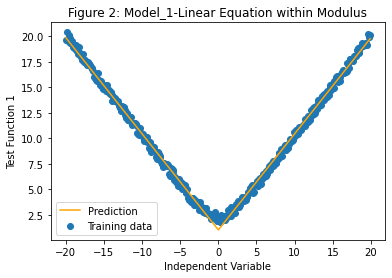

In [19]:
# Plotting the trainin data and the regression Line
plt.plot(df_train["x"], y1_pred, color="orange", label="Prediction")
plt.scatter(x=df_train["x"], y=df_train["y1"], label='Training data')
plt.xlabel("Independent Variable")
plt.ylabel("Test Function 1")
plt.title("Figure 2: Model_1-Linear Equation within Modulus")
plt.legend();

In [20]:
# Total number of values
n = len(df_train["y1"])

# MODEL EVALUATION USING LEAST SQUARES
# CALCULATE THE RMSE FOR EACH COLUMN OF THE IDEAL FUNCTIONS DATA FRAME COMPARED WITH PREDICTED VALUES --

rmse_for_model_1 = []        #the list where the rmse values shall be stored

# for each column in the dataframe
for column in df_ideal.columns[1:]:
    rmse = 0
    for i in range(n):
        y_pred = intercept + coefficient * abs(df_train["x"][i])   # model_1 predicts values of y
        rmse += (df_ideal[column][i] - y_pred) ** 2      # square error between the predicted and the ideal values
    rmse = np.sqrt(rmse/n)                               # finds the square root of the  of the mean of the squared errors
    rmse_for_model_1.append(rmse)                        # store the value of each iteration

In [21]:
# DETERMINING THE BEST FIT EQUATION FOR THE FIRST DATA

minimum = min(rmse_for_model_1)          # finds the minimum rmse
item = minimum                           # assign the minimum rmse to item

#search the number of the best fit equation out of the 50 provided
index_1 = 1 + rmse_for_model_1.index(item) 
print(
    'The best fit of the first training function out of the fifty ideal functions is function number: ', 
      index_1)

The best fit of the first training function out of the fifty ideal functions is function number:  33


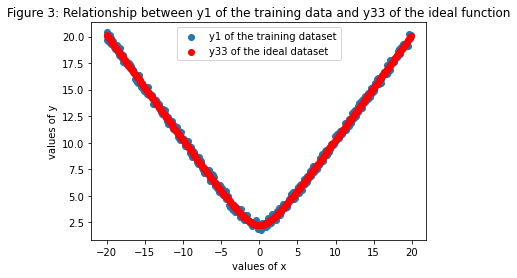

In [22]:
# TESTING THE DATA

plt.scatter(df_train["x"], df_train["y1"], label="y1 of the training dataset")
plt.scatter(df_ideal["x"], df_ideal["y33"], color="red", label="y33 of the ideal dataset")
plt.xlabel("values of x")
plt.ylabel("values of y")
plt.title("Figure 3: Relationship between y1 of the training data and y33 of the ideal function")
plt.legend();

**PART THREE**

*This part of the program focus on studying the second training function. It determines the type of equation of y1 training and the corresponding ideal equation.*

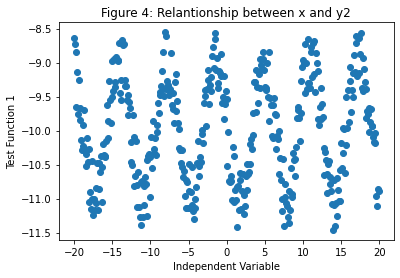

In [23]:
#CHECK THE RELATIONSHIP BETWEEN X and the second traning function
plt.scatter(x=df_train["x"], y=df_train["y2"])
plt.xlabel("Independent Variable")
plt.ylabel("Test Function 1")
plt.title("Figure 4: Relantionship between x and y2");

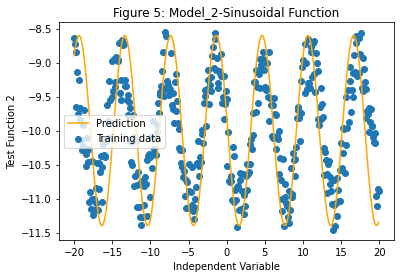

In [24]:
# Based on Figure 1 we know y2 is a sinusoidal function.
# Based on Figure 1 we know approximately the following parameters about y2
amplitude_1 = 1.4                      # Amplitude
angular_frequency_1 = 3.14159265359/3      # angular frequency
phase_1 = 3                            # phase
vertical_shift_1 = -10                 # Vertical shift

# Generate the equation that defines y2
y2_pred = amplitude_1*np.sin(angular_frequency_1*df_train["x"] + phase_1) + vertical_shift_1

# Plotting the training data and the regression Line
plt.plot(df_train["x"], y2_pred, color="orange", label="Prediction")
plt.scatter(x=df_train["x"], y=df_train["y2"], label='Training data')
plt.xlabel("Independent Variable")
plt.ylabel("Test Function 2")
plt.title("Figure 5: Model_2-Sinusoidal Function")
plt.legend();

In [25]:
# MODEL EVALUATION USING LEAST SQUARES
# CALCULATE THE RMSE FOR EACH COLUMN OF THE IDEAL FUNCTIONS DATA FRAME COMPARED WITH PREDICTED VALUES --


n = len(df_train["y1"])       # Total number of values
rmse_for_model_2 = []         # the list where the rmse values is stored

# for each column in the dataframe
for column in df_ideal.columns[1:]:
    rmse = 0
    for i in range(n):
        # model_1 predicts values of y
        y2_pred = amplitude_1*np.sin(angular_frequency_1*df_train["x"][i] + phase_1) + vertical_shift_1 
        # square error between the predicted and the ideal values
        rmse += (df_ideal[column][i] - y2_pred) ** 2      
    rmse = np.sqrt(rmse/n)             # finds the square root of the  of the mean of the squared errors
    rmse_for_model_2.append(rmse)      # store the value of each iteration

In [26]:
# DETERMINING THE IDEAL FUNCTION OUT OF THE FIFTY IDEAL FOR THE FIRST TRAINING DATA

minimum = min(rmse_for_model_2)          # finds the minimum rmse
item = minimum                           # assign the minimum rmse to item

#search the number of the best fit equation out of the 50 provided
index_2 = 1 + rmse_for_model_2.index(item) 

print(
    'The best fit of the first training function out of the fifty ideal functions is function number: ', 
      index_2)

The best fit of the first training function out of the fifty ideal functions is function number:  5


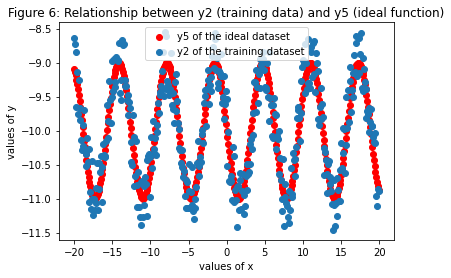

In [27]:
# TESTING THE DATA IDEAL FUNCTION FOR THE SECOND TRAINING FUNCTION

plt.scatter(df_ideal["x"], df_ideal["y5"], color="red", label="y5 of the ideal dataset")
plt.scatter(df_train["x"], df_train["y2"], label="y2 of the training dataset")
plt.xlabel("values of x")
plt.ylabel("values of y")
plt.title("Figure 6: Relationship between y2 (training data) and y5 (ideal function)")
plt.legend();

**PART FOUR**

*This part of the program focus on studying the third training equation. It determines the type of equation of y1 training and the corresponding ideal equation*

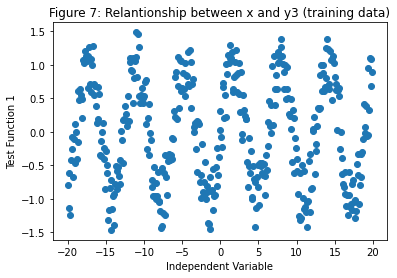

In [28]:
#CHECK THE RELATIONSHIP BETWEEN X and each of train Functions
plt.scatter(x=df_train["x"], y=df_train["y3"])
plt.xlabel("Independent Variable")
plt.ylabel("Test Function 1")
plt.title("Figure 7: Relantionship between x and y3 (training data)");

In [29]:
# Based on Figure 1 we know y3 is a sinusoidal function. 
# We can estmate the following parameters of y3:


amplitude_2 = 1.5                      # Amplitude
angular_frequency_2 = 3.14159265359/3      # angular frequency
phase_2 = 0.08                         # phase
vertical_shift_2 = -0.07               # Vertical shift

# Generate the equation that defines y3
y3_pred = amplitude_2*np.sin(angular_frequency_2*df_train["x"] + phase_2) + vertical_shift_2

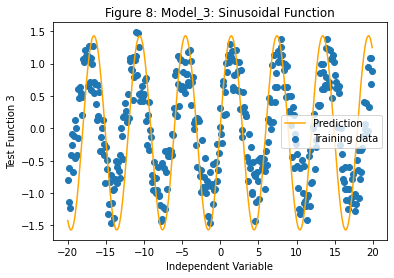

In [30]:
# Plotting the trainin data and the regression Line
plt.plot(df_train["x"], y3_pred, color="orange", label="Prediction")
plt.scatter(x=df_train["x"], y=df_train["y3"], label='Training data')
plt.xlabel("Independent Variable")
plt.ylabel("Test Function 3")
plt.title("Figure 8: Model_3: Sinusoidal Function")
plt.legend();

In [31]:
# MODEL EVALUATION USING LEAST SQUARES
# CALCULATE THE RMSE FOR EACH COLUMN OF THE IDEAL FUNCTIONS DATA FRAME COMPARED WITH PREDICTED VALUES --


n = len(df_train["y3"])       # Total number of values
rmse_for_model_3 = []         # the list where the rmse values shall be stored

# for each column in the dataframe
for column in df_ideal.columns[1:]:
    rmse = 0
    for i in range(n):
        y3_pred = amplitude_2*np.sin(angular_frequency_2*df_train["x"][i] + phase_2) + vertical_shift_2 # model_1 predicts values of y
        rmse += (df_ideal[column][i] - y3_pred) ** 2      # square error between the predicted and the ideal values
    rmse = np.sqrt(rmse/n)                               # finds the square root of the  of the mean of the squared errors
    rmse_for_model_3.append(rmse)                        # store the value of each iteration

In [32]:
# DETERMINING THE IDEAL FUNCTION OUT OF THE FIFTY IDEAL FOR THE THIRD TRAINING FUNCTION

# finds the minimum rmse
minimum = min(rmse_for_model_3)          

# assign the minimum rmse to item
item = minimum                           

# search the index of the best fit equation out of the 50 provided
index_3 = 1 + rmse_for_model_3.index(item) 

print('The best fit for the 3rd training function out of the fifty ideal functions is function number: ', 
      index_3)

The best fit for the 3rd training function out of the fifty ideal functions is function number:  1


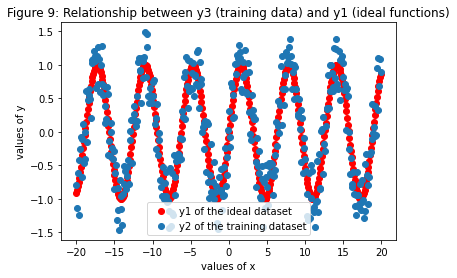

In [33]:
# TESTING THE DATA IDEAL FUNCTION FOR THE SECOND TRAINING FUNCTION

plt.scatter(df_ideal["x"], df_ideal["y1"], color="red", label="y1 of the ideal dataset")
plt.scatter(df_train["x"], df_train["y3"], label="y2 of the training dataset")
plt.xlabel("values of x")
plt.ylabel("values of y")
plt.title("Figure 9: Relationship between y3 (training data) and y1 (ideal functions)")
plt.legend();

**PART FIVE**

*This part of the program focus on studying the fourth training equation. It determines the type of equation of y1 training and the corresponding ideal equation*

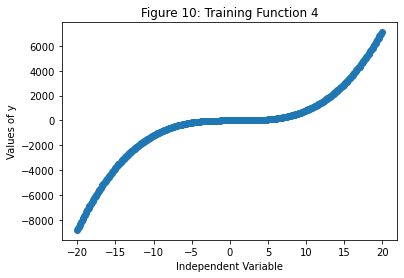

In [34]:
#CHECK THE RELATIONSHIP BETWEEN X and each of train Functions
plt.scatter(x=df_train["x"], y=df_train["y4"])
plt.xlabel("Independent Variable")
plt.ylabel("Values of y")
plt.title("Figure 10: Training Function 4");

In [35]:
# Defining Features
features = ["x"]
X = df_train[features]

# Defining target
target = "y4"
y = df_train[target]

In [36]:
# Fitting Linear Regression to the dataset

from sklearn.linear_model import LinearRegression
lin = LinearRegression()
 
lin.fit(X, y)

LinearRegression()

In [37]:
# Based on figure 4 we know y4 is a cuboid.
# Fitting Polynomial Regression to the dataset, we get:

from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

In [38]:
# Extract the coefficients of the equation
coefficients = lin2.fit(X_poly, y).coef_
coefficients

array([ 0.00000000e+00,  2.67463839e-03, -2.00023105e+00,  9.99995458e-01,
        7.12350298e-07])

In [39]:
# MODEL EVALUATION USING LEAST SQUARES
# CALCULATE THE RMSE FOR EACH COLUMN OF THE IDEAL FUNCTIONS DATA FRAME COMPARED WITH PREDICTED VALUES --


n = len(df_train["y4"])       # Total number of values
rmse_for_model_4 = []         # the list where the rmse values shall be stored

# for each column in the dataframe
for column in df_ideal.columns[1:]:
    rmse = 0
    for i in range(n):
        y4_pred = lin2.predict(poly.fit_transform(X))
        # square error between the predicted and the ideal values
        rmse += (df_ideal[column][i] - y4_pred[i]) ** 2    
    rmse = np.sqrt(rmse/n)                  # finds the square root of the  of the mean of the squared errors
    rmse_for_model_4.append(rmse)           # store the value of each iteration

In [40]:
# DETERMINING THE IDEAL FUNCTION OUT OF THE FIFTY IDEAL FOR THE THIRD TRAINING FUNCTION

minimum = min(rmse_for_model_4)          # finds the minimum rmse
item = minimum                           # assign the minimum rmse to item

index_4 = 1 + rmse_for_model_4.index(item) # search the index of the best fit equation out of the 50 provided

print('The best fit for the fouth training function out of the fifty ideal functions is function number: ', 
      index_4)

The best fit for the fouth training function out of the fifty ideal functions is function number:  30


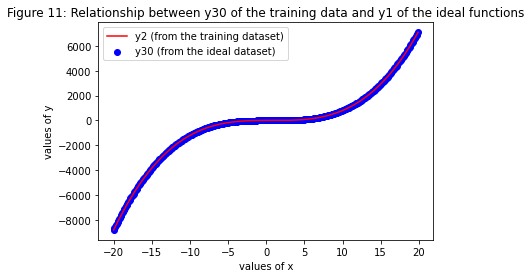

In [41]:
# TESTING THE DATA IDEAL FUNCTION FOR THE SECOND TRAINING FUNCTION

plt.plot(df_train["x"], df_train["y4"], color="red", label="y2 (from the training dataset)")
plt.scatter(df_ideal["x"], df_ideal["y30"], color="blue", label="y30 (from the ideal dataset)")
plt.xlabel("values of x")
plt.ylabel("values of y")
plt.title("Figure 11: Relationship between y30 of the training data and y1 of the ideal functions")
plt.legend();

**TASK 1 RESULTS**

In [42]:
# Create a data frame containing the four training function and their corresponding ideal functions

data = [['y1',index_1],['y2',index_2],['y3',index_3],['y4',index_4]]
df_train_ideal_functions = pd.DataFrame(data, columns = ['Training function','Number of the Corresponding Ideal function'])
df_train_ideal_functions

,Training function,Number of the Corresponding Ideal function
0,y1,33
1,y2,5
2,y3,1
3,y4,30


**TASK 2**

In [43]:
df_test.head()

,x,y
0,19.0,17.754017
1,-0.7,-3444.012500
2,-5.6,-232.979830
3,6.1,5950.886000
4,0.2,5.371201


In [44]:
# CREATE A DATAFRAME 
# Calculate and store the deviation between train & ideal dataset for each of the four functions studied above

df_dev_2 = pd.DataFrame()
df_dev_2["x"] = df_train["x"]
df_dev_2["y1_tain"] = df_train["y1"]
df_dev_2["y1_ideal"] = df_ideal["y33"]
df_dev_2["dev_1"] = df_train["y1"] - df_ideal["y33"]
df_dev_2["y2_tain"] = df_train["y2"]
df_dev_2["y2_ideal"] = df_ideal["y5"]
df_dev_2["dev_2"] = df_train["y2"] - df_ideal["y5"]
df_dev_2["y3_tain"] = df_train["y3"]
df_dev_2["y3_ideal"] = df_ideal["y1"]
df_dev_2["dev_3"] = df_train["y3"] - df_ideal["y1"]
df_dev_2["y4_tain"] = df_train["y4"]
df_dev_2["y4_ideal"] = df_ideal["y30"]
df_dev_2["dev_4"] = df_train["y4"] - df_ideal["y30"]
df_dev_2.head()

,x,y1_tain,y1_ideal,dev_1,y2_tain,y2_ideal,dev_2,y3_tain,y3_ideal,dev_3,y4_tain,y4_ideal,dev_4
0,-20.0,19.682550,20.124610,-0.442060,-8.643847,-9.087055,0.443208,-0.792252,-0.912945,0.120693,-8795.289,-8795.000,-0.289
1,-19.9,20.401932,20.025234,0.376698,-8.724133,-9.132356,0.408223,-1.132539,-0.867644,-0.264895,-8667.858,-8667.619,-0.239
2,-19.8,19.618414,19.925863,-0.307449,-8.848171,-9.186326,0.338155,-0.610908,-0.813674,0.202766,-8541.768,-8541.472,-0.296
3,-19.7,19.495897,19.826498,-0.330601,-9.648293,-9.248426,-0.399867,-1.236778,-0.751573,-0.485205,-8416.403,-8416.553,0.150
4,-19.6,20.155570,19.727139,0.428431,-9.133513,-9.318036,0.184523,-0.416563,-0.681964,0.265401,-8292.688,-8292.856,0.168


In [45]:
# To address the problem statement, we need to use only the maximum train-to-ideal deviation for each of the four chosen functions
# Below we extract the max for each of the four functions
y1_train_ideal_dev = max(df_dev_2["dev_1"])
y2_train_ideal_dev = max(df_dev_2["dev_2"])
y3_train_ideal_dev = max(df_dev_2["dev_3"])
y4_train_ideal_dev = max(df_dev_2["dev_4"])

In [46]:
# Calculated regression for y1, y2, y3, and y4 in the training dataset
y_calReg_1 = coefficient*abs(df_test["x"])+intercept   
y_calReg_2 = amplitude_1*np.sin(angular_frequency_1*df_test["x"] + phase_1) + vertical_shift_1 
y_calReg_3 = amplitude_2*np.sin(angular_frequency_2*df_test["x"] + phase_2) + vertical_shift_2 
y_calReg_4 = coefficients[1]*(df_test["x"]**3) + coefficients[2]*(df_test["x"]**2) + coefficients[3]*(df_test["x"]) + coefficients[-1]

# Create a DataFrame 
# In it we will store the fours calculated regressions, train-ideal deviation, test-calculated regression deviation, 
# difference between both deviations,and train-ideal deviation times sqrt(2).
df_dev = pd.DataFrame()
df_dev["x"] = df_test["x"]
df_dev["y_test"] = df_test["y"]

# Add the four calculated regressions into the DataFrame
df_dev["calculated regression 1"] = y_calReg_1
df_dev["calculated regression 2"] = y_calReg_2
df_dev["calculated regression 3"] = y_calReg_3
df_dev["calculated regression 4"] = y_calReg_4

# Add the train-ideal deviation, test-calculated regression deviation, difference between both deviations,and train-ideal deviation times sqrt(2) into the DataFrame

# y1 (from the train dataset)
df_dev["AE between test & calReg_1"] = abs(df_dev["calculated regression 1"]-df_dev["y_test"])
df_dev["y1 train_ideal max dev"] = [y1_train_ideal_dev] * len(df_dev)
df_dev["y1 train_ideal max dev times sqrt(2)"] = math.sqrt(2)*df_dev["y1 train_ideal max dev"]
df_dev["diff. between AE and train_ideal devs_1"] = df_dev["AE between test & calReg_1"] - df_dev["y1 train_ideal max dev"]

# y2 (from the train dataset)
df_dev["AE between test & calReg_2"] = abs(df_dev["calculated regression 2"]-df_dev["y_test"])
df_dev["y2 train_ideal max dev"] = [y2_train_ideal_dev] * len(df_dev)
df_dev["y2 train_ideal max dev times sqrt(2)"] = math.sqrt(2)*df_dev["y2 train_ideal max dev"]
df_dev["diff. between AE and train_ideal devs_2"] = df_dev["AE between test & calReg_2"] - df_dev["y2 train_ideal max dev"]

# y3 (from the train dataset)
df_dev["AE between test & calReg_3"] = abs(df_dev["calculated regression 3"]-df_dev["y_test"])
df_dev["y3 train_ideal max dev"] = [y3_train_ideal_dev] * len(df_dev)
df_dev["y3 train_ideal max dev times sqrt(2)"] = math.sqrt(2)*df_dev["y3 train_ideal max dev"]
df_dev["diff. between AE and train_ideal devs_3"] = df_dev["AE between test & calReg_3"] - df_dev["y3 train_ideal max dev"]

# y4 (from the train dataset)
df_dev["AE between test & calReg_4"] = abs(df_dev["calculated regression 4"]-df_dev["y_test"])
df_dev["y4 train_ideal max dev"] = [y4_train_ideal_dev] * len(df_dev)
df_dev["y4 train_ideal max dev times sqrt(2)"] = math.sqrt(2)*df_dev["y4 train_ideal max dev"]
df_dev["diff. between AE and train_ideal devs_4"] = df_dev["AE between test & calReg_4"] - df_dev["y4 train_ideal max dev"]


df_dev.head()

,x,y_test,calculated regression 1,calculated regression 2,calculated regression 3,calculated regression 4,AE between test & calReg_1,y1 train_ideal max dev,y1 train_ideal max dev times sqrt(2),diff. between AE and train_ideal devs_1,...,y2 train_ideal max dev times sqrt(2),diff. between AE and train_ideal devs_2,AE between test & calReg_3,y3 train_ideal max dev,y3 train_ideal max dev times sqrt(2),diff. between AE and train_ideal devs_3,AE between test & calReg_4,y4 train_ideal max dev,y4 train_ideal max dev times sqrt(2),diff. between AE and train_ideal devs_4
0,19.0,17.754017,18.924152,-11.101518,1.284819,-684.738151,1.170135,0.492294,0.696208,0.677842,...,0.706533,28.355941,16.469198,0.495628,0.700924,15.973569,702.492168,0.4995,0.7064,701.992668
1,-0.7,-3444.012500,1.669346,-8.925770,-0.981404,-1.681027,3445.681846,0.492294,0.696208,3445.189552,...,0.706533,3434.587136,3443.031096,0.495628,0.700924,3442.535468,3442.331473,0.4995,0.7064,3441.831973
2,-5.6,-232.979830,6.289485,-10.383245,0.647662,-68.796929,239.269315,0.492294,0.696208,238.777022,...,0.706533,222.096991,233.627492,0.495628,0.700924,233.131864,164.182901,0.4995,0.7064,163.683401
3,6.1,5950.886000,6.760928,-9.948390,0.205507,-67.721532,5944.125072,0.492294,0.696208,5943.632778,...,0.706533,5960.334796,5950.680493,0.495628,0.700924,5950.184865,6018.607532,0.4995,0.7064,6018.108032
4,0.2,5.371201,1.197903,-10.094913,0.358123,0.120012,4.173297,0.492294,0.696208,3.681004,...,0.706533,14.966519,5.013078,0.495628,0.700924,4.517450,5.251189,0.4995,0.7064,4.751689


In [47]:
# Creat a new dataframe that includes only the columns that you will need in the final analysis
# To facilitate the analysis, let us split the data according to y1, y2, y3, and y4 (from the train dataset)

# The two diviations involving the first train function and its corresponding ideal function
df_results = pd.DataFrame()
df_results['x'] = df_dev['x']             # this is the x-values given in the test dataset
df_results['y_test'] = df_dev['y_test']   # this is the y-values given in the test dataset

# add columns containing information about y1_train and its corresponding ideal function (y33_ideal)
df_results['If mapped to y33_ideal (or y1_train)'] = [33] * len(df_results['x'])
df_results['If not, print False'] = [0] * len(df_results['x'])
df_results['y1 train_ideal max dev times sqrt(2)'] = df_dev['y1 train_ideal max dev times sqrt(2)']
df_results['diff. between train-ideal & test-calReg. devs. for y1 (train)'] = df_dev['diff. between AE and train_ideal devs_1']

# add columns containing information about y2_train and its corresponding ideal function (y5_ideal)
df_results['If mapped to y5_ideal (or y2_train)'] = [5] * len(df_results['x'])
df_results['y2 train_ideal max dev times sqrt(2)'] = df_dev['y2 train_ideal max dev times sqrt(2)']
df_results['diff. between train-ideal & test-calReg. devs. for y2 (train)'] = df_dev['diff. between AE and train_ideal devs_2']

# add columns containing information about y3_train and its corresponding ideal function (y1_ideal)
df_results['If mapped to y1_ideal (or y3_train)'] = [1] * len(df_results['x']) 
df_results['y3 train_ideal max dev times sqrt(2)'] = df_dev['y3 train_ideal max dev times sqrt(2)']
df_results['diff. between train-ideal & test-calReg. devs. for y3 (train)'] = df_dev['diff. between AE and train_ideal devs_3']

# add columns containing information about y4_train and its corresponding ideal function (y30_ideal)
df_results['If mapped to y30_ideal (or y4_train)'] = [30] * len(df_results['x'])
df_results['y4 train_ideal max dev times sqrt(2)'] = df_dev['y4 train_ideal max dev times sqrt(2)']
df_results['diff. between train-ideal & test-calReg. devs. for y4 (train)'] = df_dev['diff. between AE and train_ideal devs_4']

df_results.head()

,x,y_test,If mapped to y33_ideal (or y1_train),"If not, print False",y1 train_ideal max dev times sqrt(2),diff. between train-ideal & test-calReg. devs. for y1 (train),If mapped to y5_ideal (or y2_train),y2 train_ideal max dev times sqrt(2),diff. between train-ideal & test-calReg. devs. for y2 (train),If mapped to y1_ideal (or y3_train),y3 train_ideal max dev times sqrt(2),diff. between train-ideal & test-calReg. devs. for y3 (train),If mapped to y30_ideal (or y4_train),y4 train_ideal max dev times sqrt(2),diff. between train-ideal & test-calReg. devs. for y4 (train)
0,19.0,17.754017,33,0,0.696208,0.677842,5,0.706533,28.355941,1,0.700924,15.973569,30,0.7064,701.992668
1,-0.7,-3444.012500,33,0,0.696208,3445.189552,5,0.706533,3434.587136,1,0.700924,3442.535468,30,0.7064,3441.831973
2,-5.6,-232.979830,33,0,0.696208,238.777022,5,0.706533,222.096991,1,0.700924,233.131864,30,0.7064,163.683401
3,6.1,5950.886000,33,0,0.696208,5943.632778,5,0.706533,5960.334796,1,0.700924,5950.184865,30,0.7064,6018.108032
4,0.2,5.371201,33,0,0.696208,3.681004,5,0.706533,14.966519,1,0.700924,4.517450,30,0.7064,4.751689


In [48]:
# USE THE WHERE METHOD TO ASSIGN THE CORRESPONDING IDEAL FUNCTION TO THOSE DATASETS THAT MEET THE CRITERIA IN THE PROBLEM STATEMENT
# Create a new column in the in the dataset of each of the four functions
# Where method to determine whether or not "existing maximum deviation of the calculated regression does not exceed the largest deviation between training dataset (A) and the ideal function (C) chosen for it by more than factor sqrt(2)"
# The values were stored in the new column

df_results['Can it be mapped to y33_ideal (y1_train)?'] = np.where((df_results['diff. between train-ideal & test-calReg. devs. for y1 (train)'] <= df_results['y1 train_ideal max dev times sqrt(2)']),
                                    df_results['If mapped to y33_ideal (or y1_train)'], df_results['If not, print False'])

df_results['Can it be mapped to y5_ideal (y2_train)?'] = np.where((df_results['diff. between train-ideal & test-calReg. devs. for y2 (train)'] <= df_results['y2 train_ideal max dev times sqrt(2)']),
                                    df_results['If mapped to y5_ideal (or y2_train)'], df_results['If not, print False'])

df_results['Can it be mapped to y1_ideal (y3_train)?'] = np.where((df_results['diff. between train-ideal & test-calReg. devs. for y3 (train)'] <= df_results['y3 train_ideal max dev times sqrt(2)']),
                                    df_results['If mapped to y1_ideal (or y3_train)'], df_results['If not, print False'])

df_results['Can it be mapped to y30_ideal (y4_train)?'] = np.where((df_results['diff. between train-ideal & test-calReg. devs. for y4 (train)'] <= df_results['y4 train_ideal max dev times sqrt(2)']),
                                    df_results['If mapped to y30_ideal (or y4_train)'], df_results['If not, print False'])
df_results.head()

,x,y_test,If mapped to y33_ideal (or y1_train),"If not, print False",y1 train_ideal max dev times sqrt(2),diff. between train-ideal & test-calReg. devs. for y1 (train),If mapped to y5_ideal (or y2_train),y2 train_ideal max dev times sqrt(2),diff. between train-ideal & test-calReg. devs. for y2 (train),If mapped to y1_ideal (or y3_train),y3 train_ideal max dev times sqrt(2),diff. between train-ideal & test-calReg. devs. for y3 (train),If mapped to y30_ideal (or y4_train),y4 train_ideal max dev times sqrt(2),diff. between train-ideal & test-calReg. devs. for y4 (train),Can it be mapped to y33_ideal (y1_train)?,Can it be mapped to y5_ideal (y2_train)?,Can it be mapped to y1_ideal (y3_train)?,Can it be mapped to y30_ideal (y4_train)?
0,19.0,17.754017,33,0,0.696208,0.677842,5,0.706533,28.355941,1,0.700924,15.973569,30,0.7064,701.992668,33,0,0,0
1,-0.7,-3444.012500,33,0,0.696208,3445.189552,5,0.706533,3434.587136,1,0.700924,3442.535468,30,0.7064,3441.831973,0,0,0,0
2,-5.6,-232.979830,33,0,0.696208,238.777022,5,0.706533,222.096991,1,0.700924,233.131864,30,0.7064,163.683401,0,0,0,0
3,6.1,5950.886000,33,0,0.696208,5943.632778,5,0.706533,5960.334796,1,0.700924,5950.184865,30,0.7064,6018.108032,0,0,0,0
4,0.2,5.371201,33,0,0.696208,3.681004,5,0.706533,14.966519,1,0.700924,4.517450,30,0.7064,4.751689,0,0,0,0


In [49]:
# Create a dataframe that will contain only the results we need to determine the ideal function of each train data point/row
df_analysis = pd.DataFrame()
df_analysis['mapping results (train y3)'] = df_results['Can it be mapped to y1_ideal (y3_train)?']
df_analysis['mapping results (train y2)'] = df_results['Can it be mapped to y5_ideal (y2_train)?']
df_analysis['mapping results (train y4)'] = df_results['Can it be mapped to y30_ideal (y4_train)?']
df_analysis['mapping results (train y1)'] = df_results['Can it be mapped to y33_ideal (y1_train)?']

# Extract the maximum value from each row and store in a new column
df_analysis['Mapped to ideal function number'] = df_analysis.max(axis=1)
#df_analysis['Which ideal function out of [y1, y5, y30, y33] can this pair be mapped to?'] = df_analysis.apply(list, axis=1)
#df_results['mapped to ideal function'] = df_001.apply(list, axis=1)
df_analysis.head()

,mapping results (train y3),mapping results (train y2),mapping results (train y4),mapping results (train y1),Mapped to ideal function number
0,0,0,0,33,33
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [50]:
# Create a data frame. Store the calculated regression of each value for each regression.
df_final_results = pd.DataFrame()

# Add x_test and y_test columns
df_final_results['X_test'] = df_dev['x']
df_final_results['Y_test'] = df_dev['y_test']

# Calculate the delta between test and calRegression of each row for each equation
df_final_results['calculated regression 1 (y33)'] = df_dev['calculated regression 1']
df_final_results['Delta_1 (y_test-calReg_1)'] = abs(df_final_results['Y_test'] - df_final_results['calculated regression 1 (y33)'])

df_final_results['calculated regression 2 (y5)'] = df_dev['calculated regression 2']
df_final_results['Delta_2 (y_test-calReg_2)'] = abs(df_final_results['Y_test'] - df_final_results['calculated regression 2 (y5)'])

df_final_results['calculated regression 3 (y1)'] = df_dev['calculated regression 3']
df_final_results['Delta_3 (y_test-calReg_3)'] = abs(df_final_results['Y_test'] - df_final_results['calculated regression 3 (y1)'])

df_final_results['calculated regression 4 (y30)'] = df_dev['calculated regression 4']
df_final_results['Delta_4 (y_test-calReg_4)'] = abs(df_final_results['Y_test'] - df_final_results['calculated regression 4 (y30)'])


# Drop columns that are no longer needed and do not need to be displayed
df_final_results.drop(columns=["calculated regression 1 (y33)", 
                        "calculated regression 2 (y5)", 
                        "calculated regression 3 (y1)", 
                        "calculated regression 4 (y30)"], 
               inplace=True)

# Extract the minimum value from each row and store in a new column. This is the delta y (test func.) column
df_final_results['Delta_Y_test'] = df_final_results.min(axis=1)


# Add a column that displays the number of ideal functions
df_final_results['No_of_ideal_function'] = df_analysis['Mapped to ideal function number']


# Drop columns that are no longer needed and do not need to be displayed
df_final_results.drop(columns=["Delta_1 (y_test-calReg_1)", 
                        "Delta_2 (y_test-calReg_2)", 
                        "Delta_3 (y_test-calReg_3)",
                        "Delta_4 (y_test-calReg_4)"], 
               inplace=True)

df_final_results.head()

,X_test,Y_test,Delta_Y_test,No_of_ideal_function
0,19.0,17.754017,1.170135,33
1,-0.7,-3444.012500,-3444.012500,0
2,-5.6,-232.979830,-232.979830,0
3,6.1,5950.886000,6.100000,0
4,0.2,5.371201,0.200000,0


In [52]:
# SAVE THE RESULTS INTO THE SQLITE DATABASE

# create a table in the dataframe to store the results
c.execute('''CREATE TABLE results (X_test, Y_test, Delta_Y_test, No_of_ideal_function)''')

# write the data into sqlite tables
df_final_results.to_sql('results', conn, if_exists='append', index = False)

100